In [1]:
import os

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
import mysql.connector
from dotenv import load_dotenv

In [2]:
load_dotenv()

user = os.getenv('USER')
password = os.getenv('PASSWORD')
host = os.getenv('HOST')
database = 'SwiftMarket'

In [3]:
connection =  mysql.connector.connect( 
                                    user=user,
                                    password=password,
                                    host=host,
                                    database=database
                                    )
cursor = connection.cursor()

In [4]:
cursor = connection.cursor()

In [5]:
def read_query(query):
    cursor.execute(query)
    rows = cursor.fetchall()    
    return pd.DataFrame(data=rows,columns=cursor.column_names)

In [6]:
query = '''select * from customers limit 5'''
read_query(query)

,CustomerID,FirstName,LastName,Email,Phone,Address,State
0,C-2023-100-1,Mahika,Sunder,MahikaSunder_11@zmail.com,03412176590,"H.No. 155, Chana",Assam
1,C-2023-100-10,Zeeshan,Vasa,ZeeshanVasa_1@zmail.com,+911151051656,"52, Roy Nagar",Tripura
2,C-2023-100-100,Aaina,Sachdeva,AainaSachdeva_9@zmail.com,+918834507719,"75/92, Kade Marg",Nagaland
3,C-2023-100-101,Shray,Bajwa,ShrayBajwa_11@zmail.com,07410498662,"45, Bora Ganj",Manipur
4,C-2023-100-102,Navya,Dash,NavyaDash_5@zmail.com,+917644200850,70/782\nBahl Road,Kerala


In [7]:
query = '''select
 monthname(saledate) as monthnames,
 e.firstname,
 sum(s.totalprice) as totalprice
 from salesdata s
 join employees e
 on s.employeeid = e.employeeid
 where monthname(saledate)= 'January'
 group by monthname(s.saledate),e.firstname
 order by totalprice desc
 limit 10;
 '''
read_query(query)

,monthnames,firstname,totalprice
0,January,Bhavin,5775952.00
1,January,Nitara,5567036.00
2,January,Myra,4888628.00
3,January,Renee,3924716.00
4,January,Shray,3719152.00
5,January,Yuvaan,3348039.00
6,January,Anika,3152408.00
7,January,Kiaan,3136727.00
8,January,Yasmin,3135779.00
9,January,Hiran,3104523.00


In [8]:
df = read_query(query = query)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   monthnames  10 non-null     object
 1   firstname   10 non-null     object
 2   totalprice  10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes


In [10]:
df['totalprice'] = df['totalprice'].astype('float')

In [11]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

In [12]:
cmap_val = np.linspace(0.3,1,10)
print(cmap_val)

[0.3        0.37777778 0.45555556 0.53333333 0.61111111 0.68888889
 0.76666667 0.84444444 0.92222222 1.        ]


In [13]:
import matplotlib.cm as cm

In [14]:
cmap = plt.cm.PiYG(cmap_val)

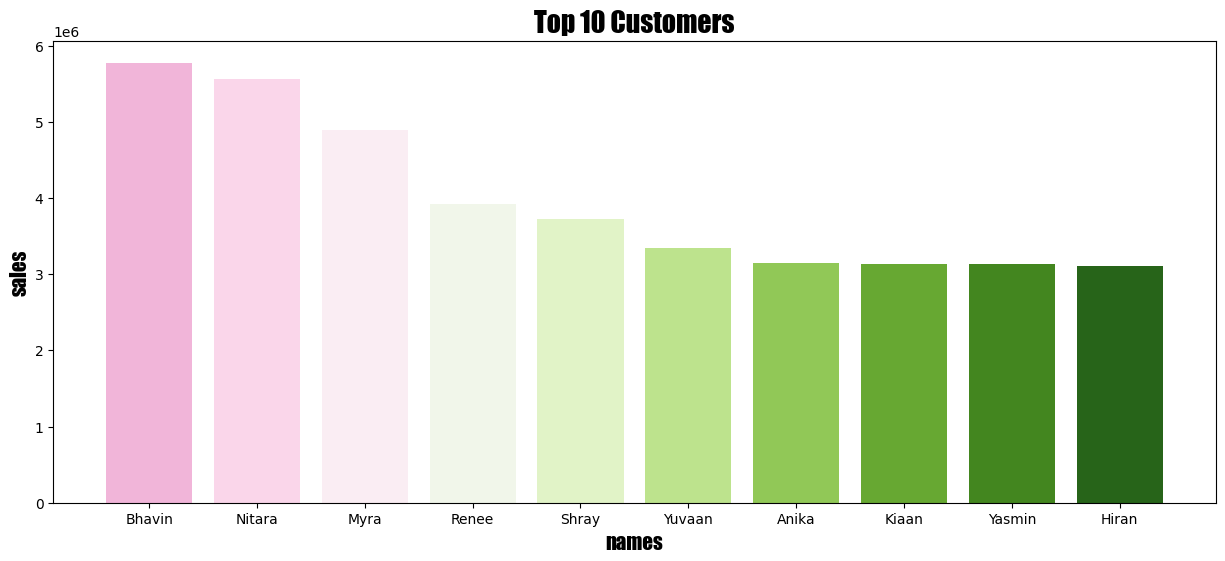

In [15]:
plt.figure(figsize=(15,6))
#plt.plot(df['totalprice'],df['firstname'],color ='green',marker ='o')
plt.bar(data = df,x = 'firstname',height = 'totalprice',color = cmap)
plt.title('Top 10 Customers',fontsize = 20, fontname='impact')
plt.xlabel('names',fontsize = 15,fontname ='impact' )
plt.ylabel('sales',fontsize = 15,fontname ='impact')
plt.savefig('figure.png')
plt.show()

#plt.savefig('top annual customer.png')

 Provide a visual representation of our annual sales performance over time?

In [16]:
query = '''select months ,total from
(select month(saledate),monthname(saledate) as months, sum(Totalprice) as total
 from salesdata
 group by months,month(saledate)
 order by month(saledate)) t;
 '''
read_query(query)


,months,total
0,January,155340130.00
1,February,140345189.00
2,March,151612551.00
3,April,150691604.00
4,May,163734120.00
5,June,143529379.00
6,July,149811843.00
7,August,158477094.00
8,September,146743920.00
9,October,143488837.00


In [17]:
df = read_query(query = query)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   months  12 non-null     object
 1   total   12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes


In [19]:
months = df['months'].values
sales = df['total'].astype('float').values

In [20]:
annual_avg = df['total'].mean()

In [21]:
goal = annual_avg*1.05

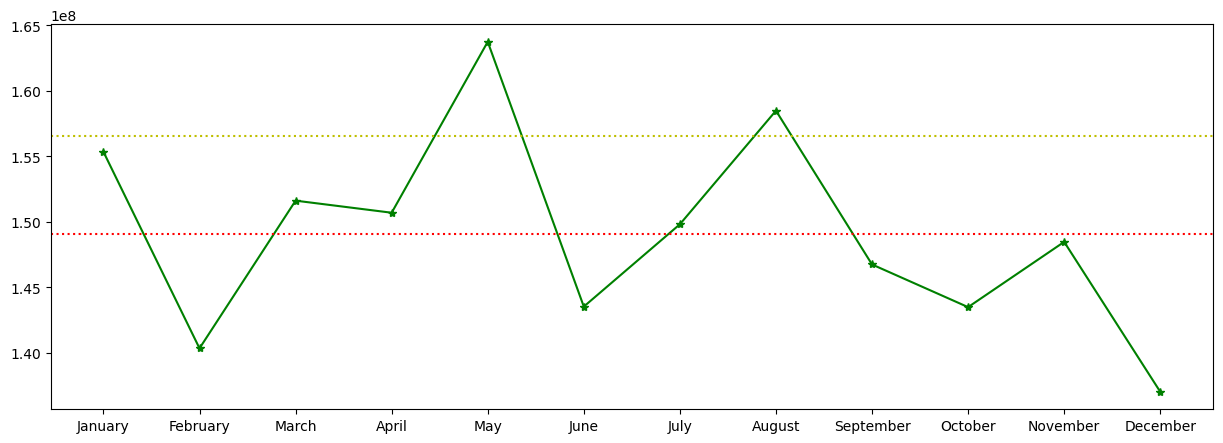

In [22]:
plt.figure(figsize=(15,5))
plt.plot(months,sales,color = 'g',marker ='*')
plt.axhline(y=annual_avg,color ='r',ls = 'dotted')
plt.axhline(y=goal,color ='y',ls = 'dotted')
plt.savefig('figure.png')

#5. What are the total sales made by each employee?

In [23]:
query = '''select firstname,sum(totalprice) as total
from employees e
join salesdata s
on e.employeeid = s.employeeid
group by firstname
order by total desc
limit 10;'''

read_query(query)

,firstname,total
0,Myra,47487729.00
1,Yasmin,44981524.00
2,Renee,43687580.00
3,Nitara,41359384.00
4,Kiaan,34380912.00
5,Yuvaan,33898153.00
6,Tiya,33265639.00
7,Chirag,33019735.00
8,Fateh,32021064.00
9,Shray,31798352.00


In [24]:
df = read_query(query = query)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   firstname  10 non-null     object
 1   total      10 non-null     object
dtypes: object(2)
memory usage: 292.0+ bytes


In [26]:
employees = df['firstname'].values
Totalsales = df['total'].astype('float').values

Text(0, 0.5, 'Sales')

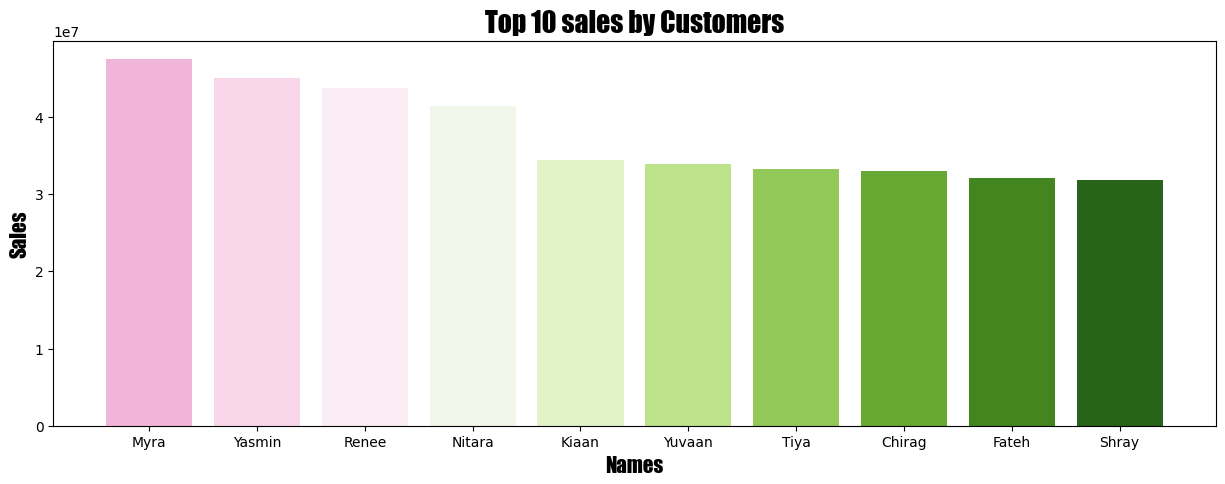

In [27]:
plt.figure(figsize =(15,5))
plt.bar(employees,Totalsales,color = cmap)
plt.title('Top 10 sales by Customers',fontsize = 20, fontname='impact')
plt.xlabel('Names',fontsize = 15,fontname ='impact' )
plt.ylabel('Sales',fontsize = 15,fontname ='impact')

6. Which category has the highest total sales?


In [28]:
query = '''select c.categoryname,sum(totalprice) as totalsales
from categories c 
join subcategories s
on c.categoryID = s.CategoryID
join salesdata sd
on sd.subcatid = s.subcatid
group by c.categoryname
order by totalsales desc;
'''
read_query(query)

,categoryname,totalsales
0,Pet Supplies and Accessories,361848986.00
1,Health and Wellness Products,324761329.00
2,Electronics and Gadgets,319374417.00
3,Books and Educational Materials,282897933.00
4,Home and Kitchen Appliances,269316684.00
5,Outdoor and Sports Equipment,231074739.00


In [29]:
df = read_query(query = query)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   categoryname  6 non-null      object
 1   totalsales    6 non-null      object
dtypes: object(2)
memory usage: 228.0+ bytes


In [31]:
Categoryname = df['categoryname'].values
Totalsales = df['totalsales'].astype('float').values

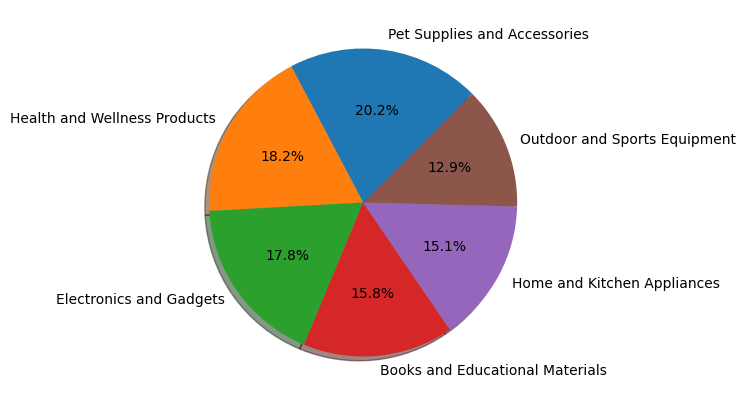

In [32]:
plt.figure(figsize=(10,5))
plt.pie(Totalsales,labels = Categoryname,shadow=True, startangle = 45,autopct='%1.1f%%')  #explode=explode,
#plt.legend(title = 'category',loc = 'lower left')

plt.show()

7. How many customers are there in each state?

In [33]:
query = '''SELECT state, COUNT(*) AS num_customers
FROM customers c
join salesdata s 
on c.customerid = s.customerid
GROUP BY state
ORDER BY num_customers desc;
''' 
read_query(query)   

,state,num_customers
0,Bihar,901
1,Goa,888
2,Manipur,821
3,Himachal Pradesh,684
4,Karnataka,663
5,Arunachal Pradesh,649
6,Nagaland,639
7,Tripura,617
8,Madhya Pradesh,617
9,Gujarat,598


In [34]:
df = read_query(query=query)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   state          21 non-null     object
 1   num_customers  21 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [35]:
cmap = plt.cm.magma(cmap_val)

In [36]:
States = df['state'].values
No_of_customers = df['num_customers'].values

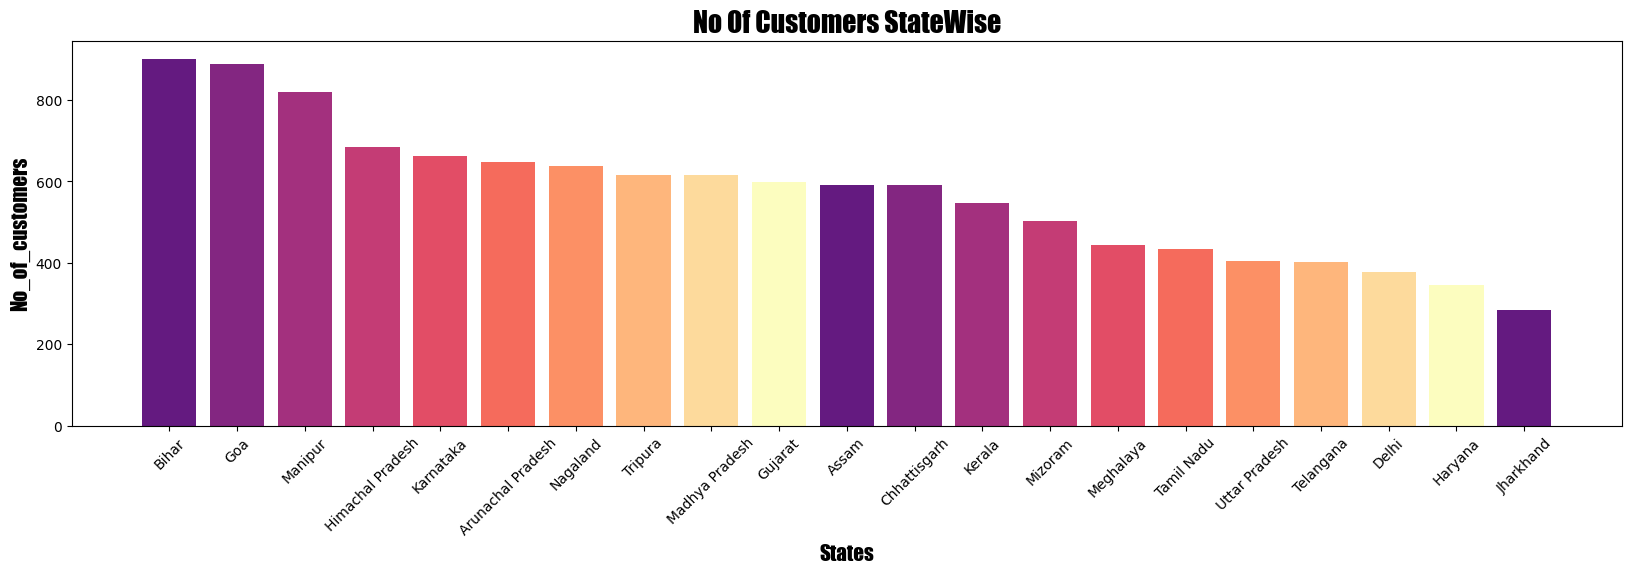

In [37]:
plt.figure(figsize=(20,5))
plt.bar(States,No_of_customers,color =cmap)
plt.title("No Of Customers StateWise",fontsize = 20,fontname = 'impact')
plt.xlabel('States',fontsize = 15, fontname = 'impact')
plt.ylabel('No_of_customers',fontsize = 15, fontname = 'impact')
plt.xticks(rotation=45) 
plt.show()

8. What is the average quantity of each product sold?

In [38]:
query = '''SELECT sc.subcatname, AVG(quantity) AS average_quantity
FROM salesdata s 
join subcategories sc
on s.subcatid = sc.subcatid
GROUP BY s.SubcatID
order by average_quantity desc;
'''
read_query(query)

,subcatname,average_quantity
0,Resistance bands,3.1587
1,Workbooks,3.1496
2,Camping tent,3.1071
3,Foam roller,3.0980
4,Portable power banks,3.0974
5,Laptops,3.0821
6,Bicycle,3.0703
7,Dog/cat food,3.0673
8,Fiction novels,3.0637
9,Pet beds,3.0504


In [39]:
df = read_query(query=query)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   subcatname        30 non-null     object
 1   average_quantity  30 non-null     object
dtypes: object(2)
memory usage: 612.0+ bytes


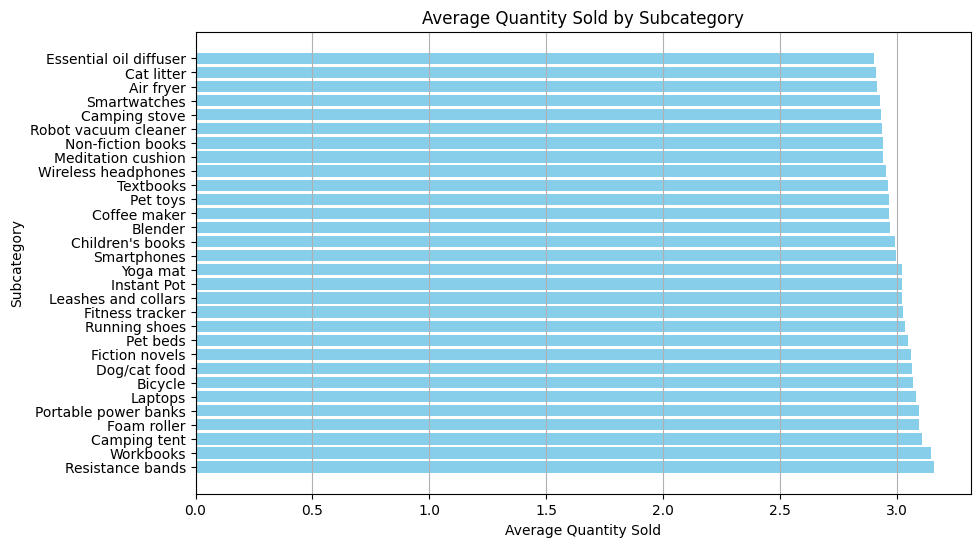

In [40]:
# Extracting data
subcategories = df['subcatname']
average_quantity = df['average_quantity'].astype('float')

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.barh(subcategories, average_quantity, color='skyblue')
plt.xlabel('Average Quantity Sold')
plt.ylabel('Subcategory')
plt.title('Average Quantity Sold by Subcategory')
plt.grid(axis='x')
plt.show()

9. Which supplier has the highest total sales?

In [41]:
query = '''select se.supplierid,suppliername,sum(TotalPrice) as totalprice
from salesdata s
join subcategories sc
on s.subcatid = sc.subcatid
join suppliers se
on sc.supplierid = se.supplierid
group by se.supplierid
order by totalprice desc
;
'''
read_query(query)

,supplierid,suppliername,totalprice
0,3040,Dora-Aggarwal,180265340.00
1,3004,Agate-Kalita,141629408.00
2,3002,"Sridhar, Sidhu and Maharaj",124268051.00
3,3003,"Sahota, Khurana and Kumar",119604888.00
4,3074,Date-Mander,117152046.00
5,3078,Verma-Vig,112563616.00
6,3075,"Kapur, Acharya and Wadhwa",98842528.00
7,3073,"Sastry, Bali and Deshmukh",86990482.00
8,3069,Mall Group,82034102.00
9,3080,"Khare, Boase and Gole",80254640.00


In [42]:
df = read_query(query=query)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   supplierid    22 non-null     int64 
 1   suppliername  22 non-null     object
 2   totalprice    22 non-null     object
dtypes: int64(1), object(2)
memory usage: 660.0+ bytes


In [43]:
cmap = plt.cm.tab10(cmap_val)

In [44]:
Suppliername = df['suppliername'].values
Totalprice = df['totalprice'].astype('float').values

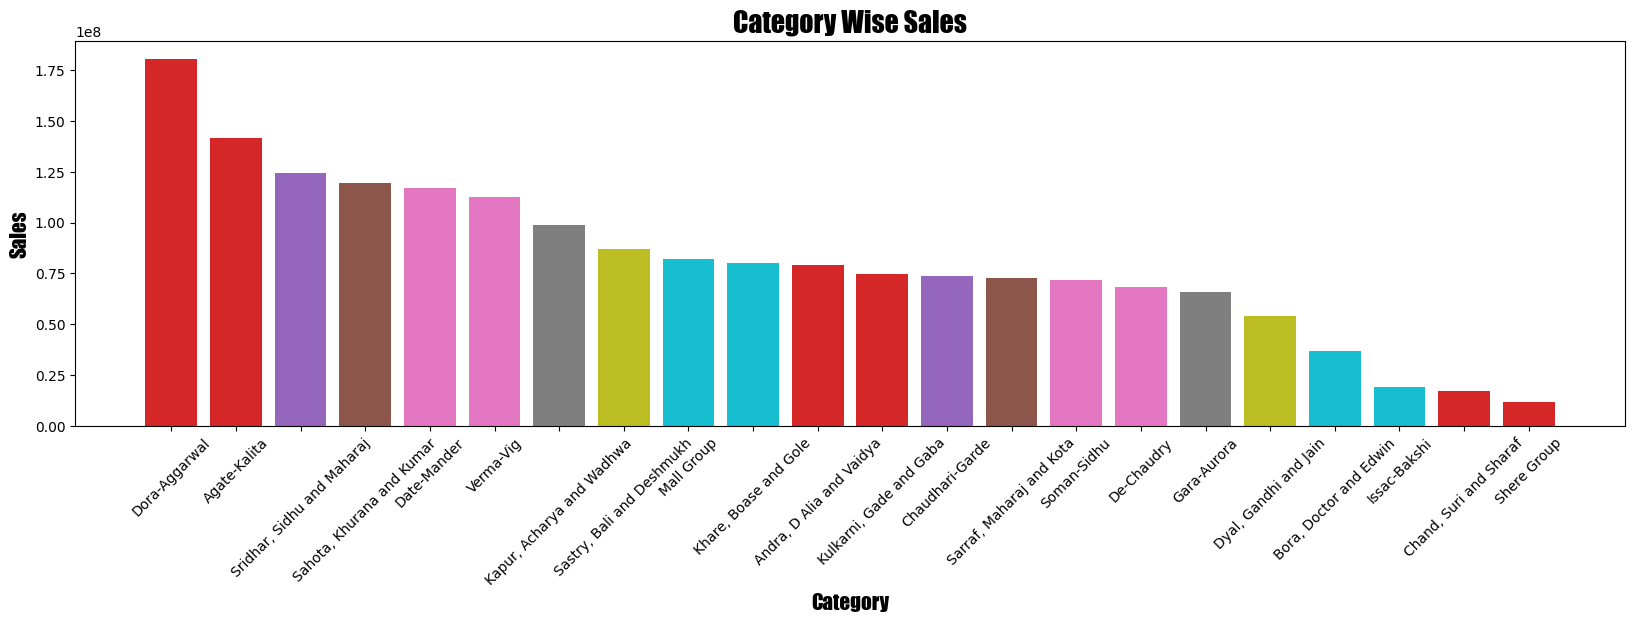

In [45]:
plt.figure(figsize=(20,5))
plt.bar(Suppliername,Totalprice,color = cmap)
plt.title("Category Wise Sales",fontsize = 20,fontname = 'impact')
plt.xlabel('Category',fontsize = 15, fontname = 'impact')
plt.ylabel('Sales',fontsize = 15, fontname = 'impact')
plt.xticks(rotation=45) 
plt.show()

10. What is the total revenue generated from sales in each state?


In [46]:
query = '''select state,sum(totalprice) as total_revenue
from salesdata s
join customers c 
on s.customerid = c.customerid
group by state
order by total_revenue desc;
'''
read_query(query)

,state,total_revenue
0,Goa,126990041.00
1,Bihar,126103984.00
2,Manipur,122908203.00
3,Himachal Pradesh,102905140.00
4,Karnataka,99671386.00
5,Arunachal Pradesh,97340033.00
6,Tripura,92329290.00
7,Madhya Pradesh,91859171.00
8,Gujarat,91624425.00
9,Chhattisgarh,91546717.00


In [47]:
df = read_query(query=query)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   state          21 non-null     object
 1   total_revenue  21 non-null     object
dtypes: object(2)
memory usage: 468.0+ bytes


In [48]:
State = df['state'].values
Total_Revenue = df['total_revenue'].astype('float').values

In [49]:
cmap_val = np.linspace(0.3,1,21)
print(cmap_val)
cmap = plt.cm.viridis(cmap_val)
len(cmap)

[0.3   0.335 0.37  0.405 0.44  0.475 0.51  0.545 0.58  0.615 0.65  0.685
 0.72  0.755 0.79  0.825 0.86  0.895 0.93  0.965 1.   ]


21

In [50]:
color_index = 0  # Index of the color you want to choose from the colormap
cmap = plt.get_cmap('viridis')  # Example: using 'tab10' colormap
color = cmap(color_index)

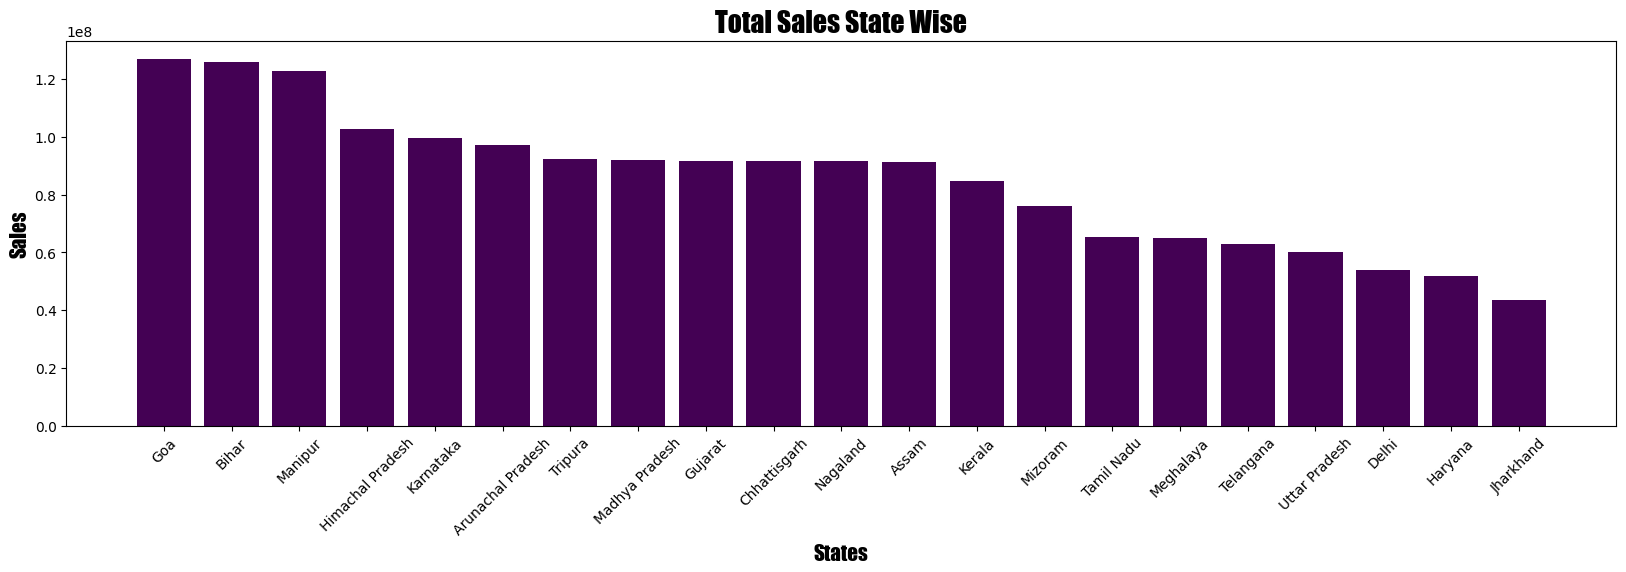

In [51]:
plt.figure(figsize=(20,5))
plt.bar(State,Total_Revenue,color = color)
plt.title('Total Sales State Wise', fontsize = 20,fontname = 'impact')
plt.xlabel('States',fontsize = 15,fontname = 'impact')
plt.ylabel('Sales',fontsize = 15,fontname = 'impact')
plt.xticks(rotation = 45)
plt.show()

#11. How many sales were made by each customer?


In [55]:
query = ''' select sum(totalprice) as total,firstname from salesdata s
join customers c 
on s.customerid = c.customerid
group by firstname
order by total 
limit 10;
'''

read_query(query)

,total,firstname
0,5950321.00,Reyansh
1,6243957.00,Biju
2,6676018.00,Anvi
3,6842296.00,Jivika
4,6868748.00,Tejas
5,6874588.00,Aniruddh
6,6894228.00,Mohanlal
7,6991892.00,Rania
8,7066913.00,Hansh
9,7091213.00,Dhanuk


In [63]:
color_index = 0  # Index of the color you want to choose from the colormap
cmap = plt.get_cmap('crest_r')  # Example: using 'tab10' colormap
color = cmap(color_index)

In [56]:
df = read_query(query=query)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   total      10 non-null     object
 1   firstname  10 non-null     object
dtypes: object(2)
memory usage: 292.0+ bytes


In [58]:
Total_sales = df['total'].astype('float').values
Names = df['firstname'].values

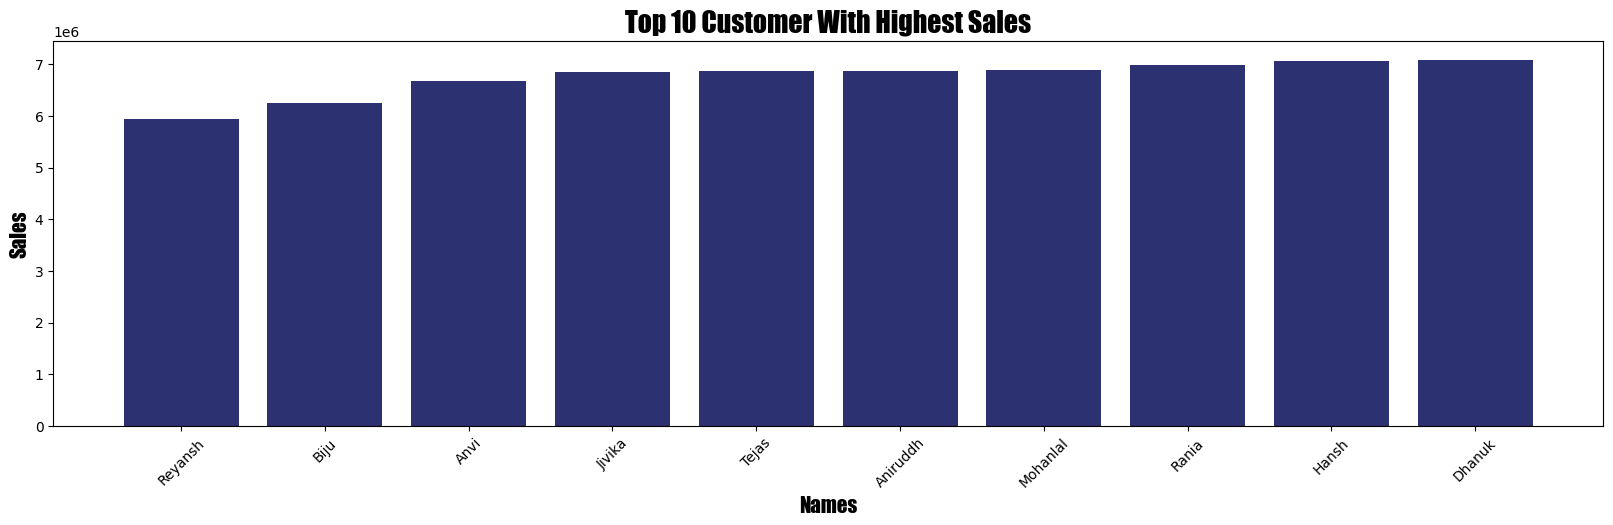

In [70]:
plt.figure(figsize=(20,5))
plt.bar(Names,Total_sales,color =color )
plt.title('Top 10 Customer With Highest Sales',fontsize= 20,fontname = 'impact')
plt.xlabel('Names',fontsize=15,fontname='impact')
plt.ylabel('Sales',fontsize=15,fontname='impact')
plt.xticks(rotation = 45)
plt.show()

12. What is the total salary expenditure on employees in each department?


In [77]:
query='''select  distinct(department), sum(salary) as total_salary
from employees
group by department
order by total_salary desc;
'''
read_query(query)

,department,total_salary
0,Analyst,732044.77
1,ML Engineer,652081.28
2,Legal,577095.43
3,HR Admin,482618.09
4,Marketing,469413.37
5,Accounts,445848.85
6,Engineering,393266.08
7,Logistics,365835.92
8,IT,351627.51
9,Sales,325662.92


In [78]:
df = read_query(query = query)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   department    10 non-null     object
 1   total_salary  10 non-null     object
dtypes: object(2)
memory usage: 292.0+ bytes


In [84]:
color_index = 0  # Index of the color you want to choose from the colormap
cmap = plt.get_cmap('twilight_shifted')
color = cmap(color_index)

In [79]:
Departments = df['department'].values
Expenditure=df['total_salary'].astype('float').values

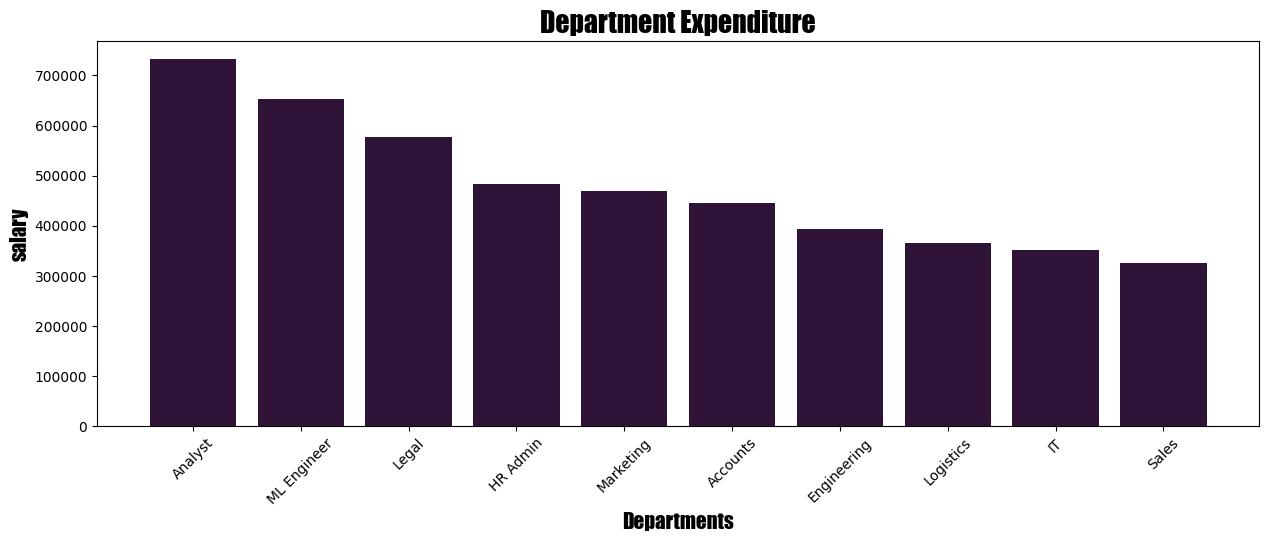

In [85]:
plt.figure(figsize=(15,5))
plt.bar(Departments,Expenditure,color =color )
plt.title('Department Expenditure',fontsize= 20,fontname = 'impact')
plt.xlabel('Departments',fontsize=15,fontname='impact')
plt.ylabel('salary',fontsize=15,fontname='impact')
plt.xticks(rotation = 45)
plt.show()